* Project Team ID - PTID-CDS-SEP-25-3134
* Project ID - PRCP-1004-Fifa20

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,classification_report

In [107]:
df = pd.read_csv("dataset_35_dermatology (1).csv")

In [108]:
pd.set_option("display.max_columns",None)

#### Business Case
* Suggestions to the Doctors to identify the skin diseases of the patient at the earliest. 

### Domain Analysis
* What’s Inside the Dataset
    * Total 34 columns (features)
    * 33 are numbers (0–3) showing how strongly a symptom appears.
    * 1 column (Age) is continuous — shows the patient’s age.
    * Each row is a patient.

##### There are two types of features:
**1. Clinical Attributes (based on visible symptoms)**

1.	Erythema :	Redness of the skin. How red or inflamed the skin looks.
2.	Scaling :	Flaky or peeling skin. How much the skin is peeling or flaking.
3.	Definite borders :	Sharp edges of lesion. If the edges of the affected area are clear or blurry.
4.	Itching :	Feeling of irritation. How much the patient feels itchy.
5.	Koebner phenomenon :	Lesion appears after injury. If new spots appear on previously injured skin.
6.	Polygonal papules :	Flat-topped bumps. If small, flat, polygon-shaped bumps are seen. Common in lichen planus.
7.	Follicular papules :	Bumps around hair follicles. If the bumps occur near hair follicles.
8.	Oral mucosal involvement :	Mouth lesions. If there are sores or lesions inside the mouth.
9.	Knee and elbow involvement :	Lesions on joints. If the disease affects knees or elbows (common in psoriasis).
10.	Scalp involvement :	Lesions on scalp. If the scalp is affected. (Common in seborrheic dermatitis.)
11.	Family history :	Genetic tendency	1 = disease seen in family, 0 = no family history.
* All others (0–3 scale):
    * 0 → not present
    * 1 → mild
    * 2 → moderate
    * 3 → severe

**2. Histopathological Attributes (microscope-based tissue features)**
    * These help identify how deep or advanced the disease is.

12.	Melanin incontinence : Pigment loss. Whether skin pigment leaks or is lost under the skin.
13.	Eosinophils in infiltrate : Type of immune cell. Shows allergic or inflammatory response cells present.
14.	PNL infiltrate : Polymorphonuclear leukocytes. Indicates presence of white blood cells in tissue (inflammation).
15.	Fibrosis of papillary dermis :	Scarring in upper skin layer. Shows thickening or hardening of skin tissue.
16.	Exocytosis :	Cells moving into outer layer.	When immune cells move upward into the epidermis.
17.	Acanthosis :	Thickened skin layer.	Shows thickening of the epidermis (common in psoriasis).
18. Hyperkeratosis :	Thickened outer layer.	Excess keratin buildup on skin surface (dry, rough skin).
19.	Parakeratosis :	Retained nuclei in outer layer.	Cells not maturing properly; seen in psoriasis.
20.	Clubbing of the rete ridges :	Downward skin extensions.	Deep finger-like extensions of skin layers (seen in psoriasis).
21.	Elongation of the rete ridges :	Longer skin ridges.	The skin structure becomes stretched vertically.
22.	Thinning of suprapapillary epidermis :	Thinner layer above papillae.	The upper skin between ridges gets thin (common in psoriasis).
23.	Spongiform pustule :	Pus-filled bubble.	Indicates tiny pus-filled spots in the epidermis.
24.	Munro microabscess :	Small clusters of white cells.	Indicates white blood cell clusters — hallmark of psoriasis.
25.	Focal hypergranulosis :	Extra granular layer.	Local increase of skin’s granular layer.
26.	Disappearance of granular layer :	Loss of layer.	When the skin’s granular layer vanishes — abnormal condition.
27.	Vacuolisation and damage of basal layer :	Cell damage at base.	Damage at the bottom layer of the epidermis (seen in lichen planus).
28.	Spongiosis :	Fluid between cells.	Fluid build-up between skin cells — seen in eczema/dermatitis.
29.	Saw-tooth appearance of retes :	Shape of skin ridges.	Uneven "saw-tooth" shape seen in lichen planus.
30.	Follicular horn plug :	Plug in hair follicle.	Dead skin blocks hair follicles — seen in pityriasis rubra pilaris.
31.	Perifollicular parakeratosis :	Abnormal cells near follicles.	Abnormal keratinization around hair follicles.
32.	Inflammatory mononuclear infiltrate :	Immune cell buildup.	Accumulation of certain white cells (chronic inflammation).
33.	Band-like infiltrate :	Linear immune cells.	Cells form a band-like line under the skin surface.

**Linear Attribute**

34.	Age	Patient’s age.	Numeric value — age of the person being diagnosed.

**Target Column**
* The target/output is the disease type (class) — i.e., one of the 6 mentioned diseases.
1️⃣ Psoriasis
2️⃣ Seborrheic Dermatitis
3️⃣ Lichen Planus
4️⃣ Pityriasis Rosea
5️⃣ Chronic Dermatitis
6️⃣ Pityriasis Rubra Pilaris

* This is multiclass classification Problem

### Basic Checks

In [109]:
df.head()

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0         2        2                 0        3                   0   
1         3        3                 3        2                   1   
2         2        1                 2        3                   1   
3         2        2                 2        0                   0   
4         2        3                 2        2                   2   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                  0                   0                         0   
1                  0                   0                         0   
2                  3                   0                         3   
3                  0                   0                         0   
4                  2                   0                         2   

   knee_and_elbow_involvement  scalp_involvement  family_history  \
0                           1                  0               0   
1                           1                  1               1   
2                           0                  0               0   
3                           3                  2               0   
4                           0                  0               0   

   melanin_incontinence  eosinophils_in_the_infiltrate  PNL_infiltrate  \
0                     0                              0               0   
1                     0                              0               1   
2                     1                              0               0   
3                     0                              0               3   
4                     1                              0               0   

   fibrosis_of_the_papillary_dermis  exocytosis  acanthosis  hyperkeratosis  \
0                                 0           3           2               0   
1                                 0           1           2               0   
2                                 0           1           2               0   
3                                 0           0           2               0   
4                                 0           1           2               0   

   parakeratosis  clubbing_of_the_rete_ridges  elongation_of_the_rete_ridges  \
0              0                            0                              0   
1              2                            2                              2   
2              2                            0                              0   
3              3                            2                              2   
4              0                            0                              0   

   thinning_of_the_suprapapillary_epidermis  spongiform_pustule  \
0                                         0                   0   
1                                         2                   2   
2                                         0                   0   
3                                         2                   2   
4                                         0                   0   

   munro_microabcess  focal_hypergranulosis  \
0                  0                      0   
1                  1                      0   
2                  0                      2   
3                  0                      0   
4                  0                      2   

   disappearance_of_the_granular_layer  \
0                                    0   
1                                    0   
2                                    0   
3                                    3   
4                                    2   

   vacuolisation_and_damage_of_basal_layer  spongiosis  \
0                                        0           3   
1                                        0           0   
2                                        2           3   
3                                        0           0   
4                                        3           2   

   saw-tooth_appearance_of_retes  follicular_horn_plug  \

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

In [111]:
df.nunique()

erythema                                     4
scaling                                      4
definite_borders                             4
itching                                      4
koebner_phenomenon                           4
polygonal_papules                            4
follicular_papules                           4
oral_mucosal_involvement                     4
knee_and_elbow_involvement                   4
scalp_involvement                            4
family_history                               2
melanin_incontinence                         4
eosinophils_in_the_infiltrate                3
PNL_infiltrate                               4
fibrosis_of_the_papillary_dermis             4
exocytosis                                   4
acanthosis                                   4
hyperkeratosis                               4
parakeratosis                                4
clubbing_of_the_rete_ridges                  4
elongation_of_the_rete_ridges                4
thinning_of_t

In [112]:
df.describe()

erythema     scaling  definite_borders     itching  \
count  366.000000  366.000000        366.000000  366.000000   
mean     2.068306    1.795082          1.549180    1.366120   
std      0.664753    0.701527          0.907525    1.138299   
min      0.000000    0.000000          0.000000    0.000000   
25%      2.000000    1.000000          1.000000    0.000000   
50%      2.000000    2.000000          2.000000    1.000000   
75%      2.000000    2.000000          2.000000    2.000000   
max      3.000000    3.000000          3.000000    3.000000   

       koebner_phenomenon  polygonal_papules  follicular_papules  \
count          366.000000         366.000000          366.000000   
mean             0.633880           0.448087            0.166667   
std              0.908016           0.957327            0.570588   
min              0.000000           0.000000            0.000000   
25%              0.000000           0.000000            0.000000   
50%              0.000000           0.000000            0.000000   
75%              1.000000           0.000000            0.000000   
max              3.000000           3.000000            3.000000   

       oral_mucosal_involvement  knee_and_elbow_involvement  \
count                366.000000                  366.000000   
mean                   0.377049                    0.614754   
std                    0.834147                    0.982979   
min                    0.000000                    0.000000   
25%                    0.000000                    0.000000   
50%                    0.000000                    0.000000   
75%                    0.000000                    1.000000   
max                    3.000000                    3.000000   

       scalp_involvement  family_history  melanin_incontinence  \
count         366.000000      366.000000            366.000000   
mean            0.519126        0.125683              0.404372   
std             0.905639        0.331946              0.869818   
min             0.000000        0.000000              0.000000   
25%             0.000000        0.000000              0.000000   
50%             0.000000        0.000000              0.000000   
75%             1.000000        0.000000              0.000000   
max             3.000000        1.000000              3.000000   

       eosinophils_in_the_infiltrate  PNL_infiltrate  \
count                     366.000000      366.000000   
mean                        0.139344        0.546448   
std                         0.411790        0.815451   
min                         0.000000        0.000000   
25%                         0.000000        0.000000   
50%                         0.000000        0.000000   
75%                         0.000000        1.000000   
max                         2.000000        3.000000   

       fibrosis_of_the_papillary_dermis  exocytosis  acanthosis  \
count                        366.000000  366.000000  366.000000   
mean                           0.336066    1.368852    1.956284   
std                            0.853139    1.104418    0.712512   
min                            0.000000    0.000000    0.000000   
25%                            0.000000    0.000000    2.000000   
50%                            0.000000    2.000000    2.000000   
75%                            0.000000    2.000000    2.000000   
max                            3.000000    3.000000    3.000000   

       hyperkeratosis  parakeratosis  clubbing_of_the_rete_ridges  \
count      366.000000     366.000000                   366.000000   
mean         0.527322       1.289617                     0.663934   
std          0.757116       0.917562                     1.056829   
min          0.000000       0.000000                     0.000000   
25%          0.000000       1.000000                     0.000000   
50%          0.000000       1.000000                     0.000000   
75%          1.000000       2.000000                     2.000000   
max 

### EDA

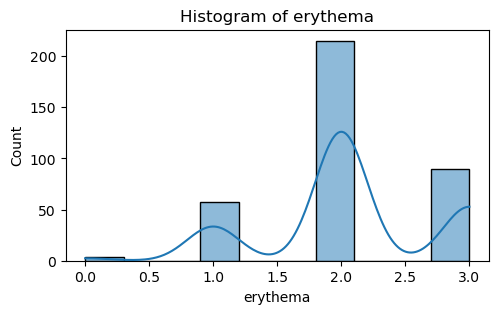

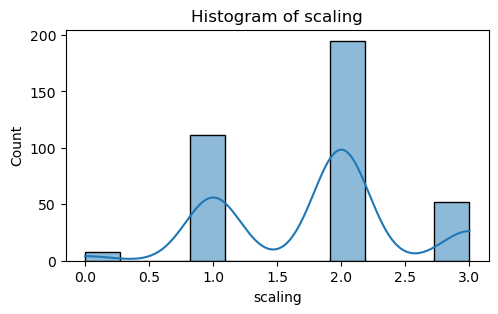

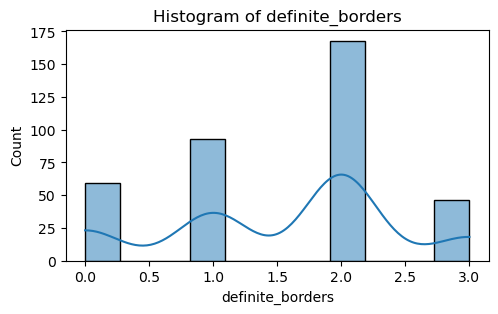

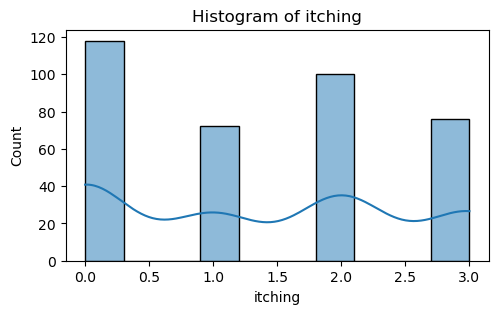

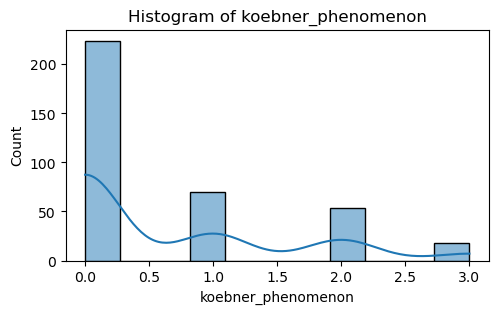

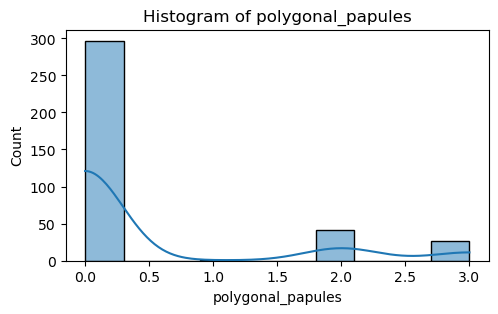

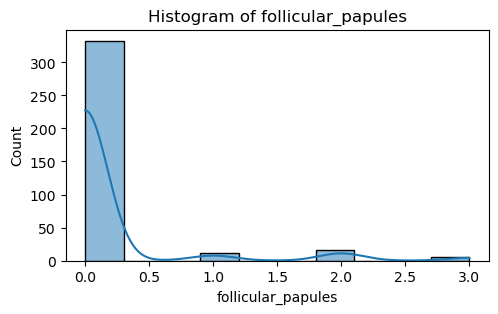

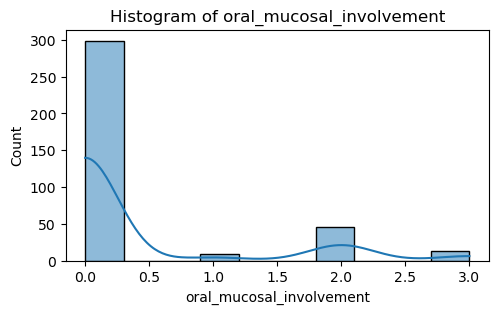

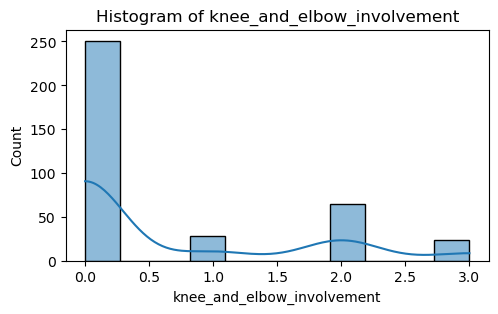

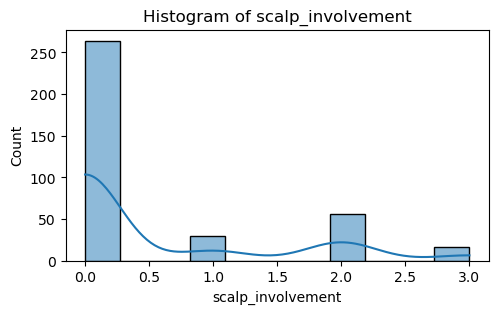

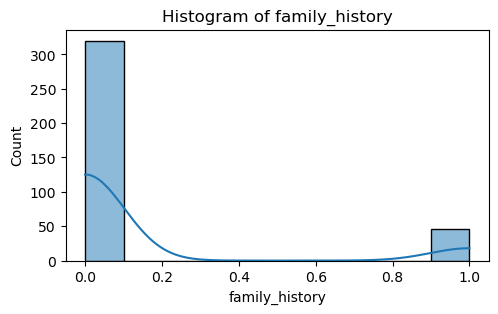

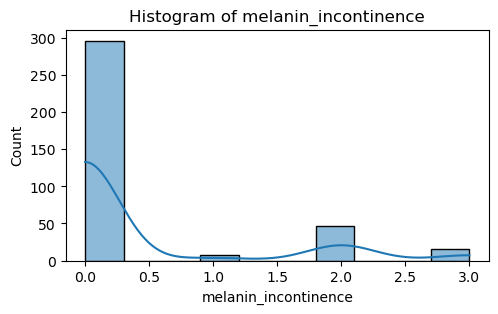

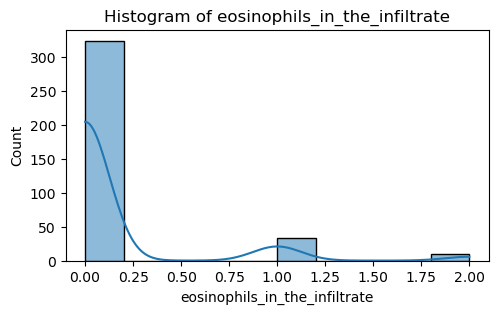

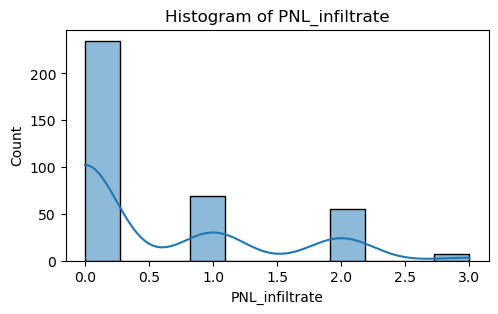

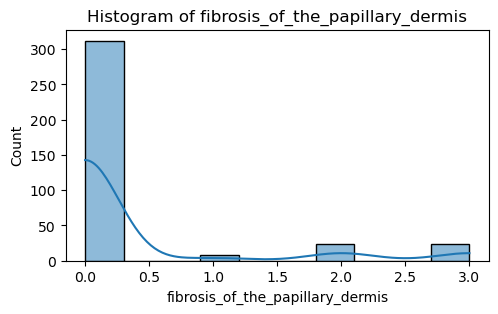

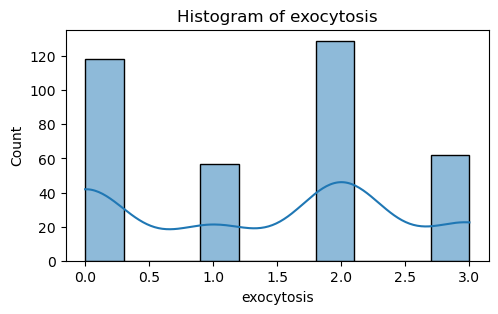

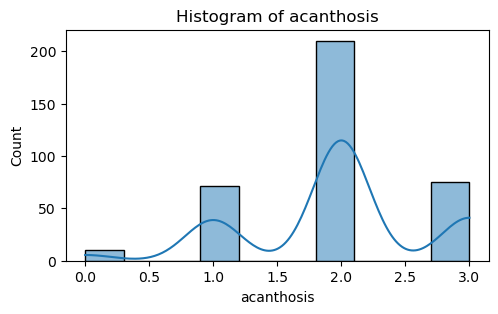

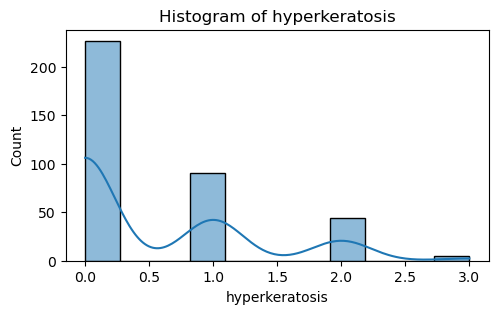

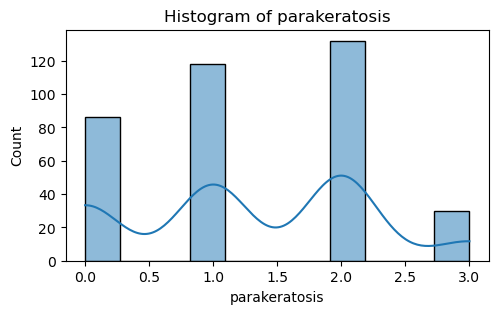

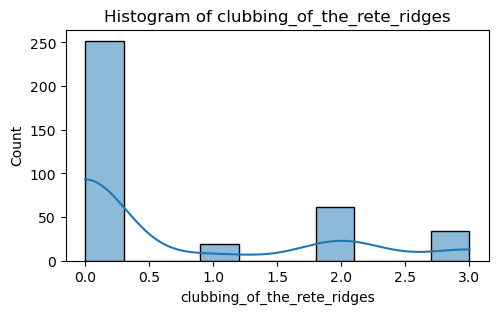

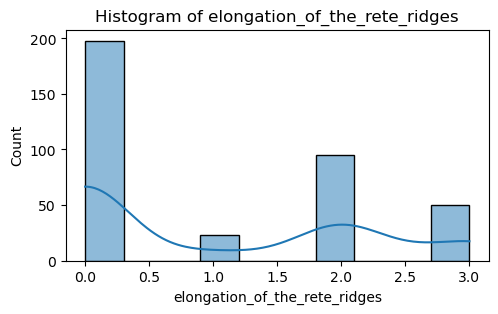

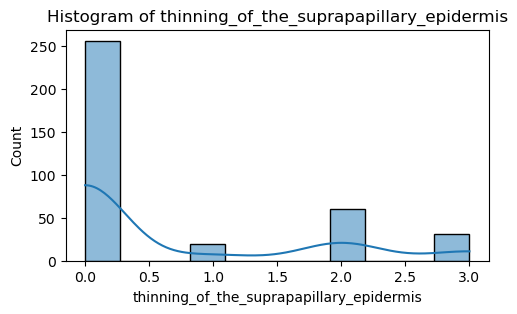

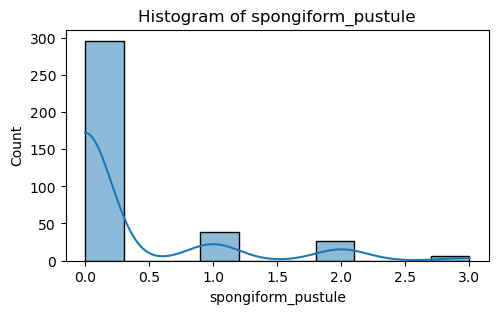

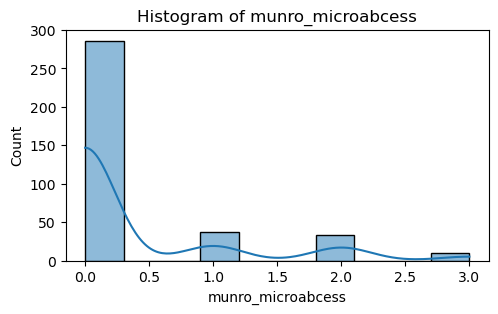

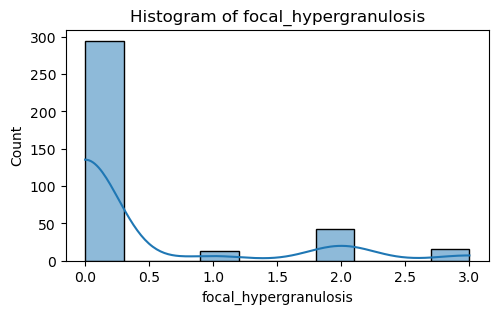

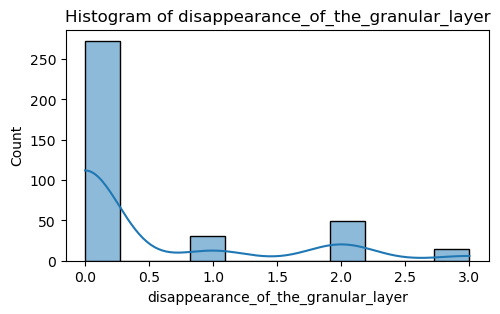

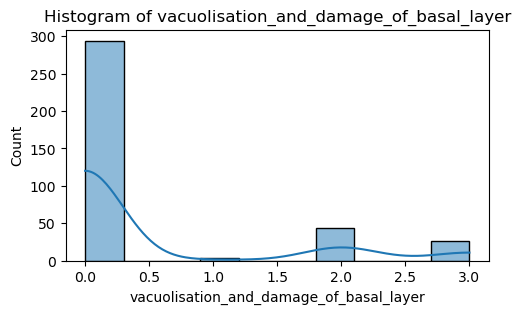

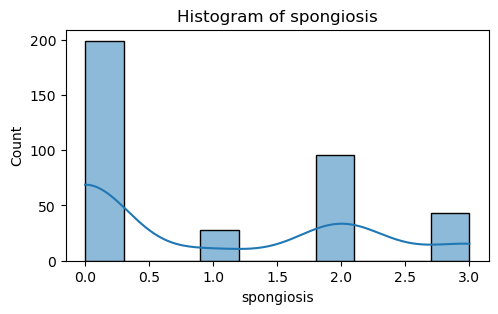

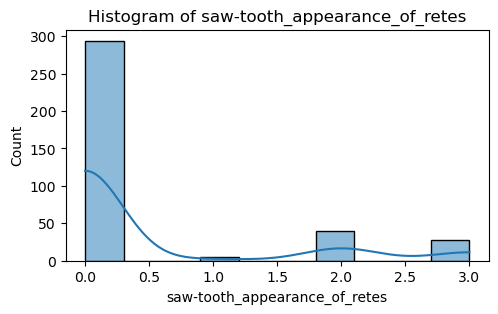

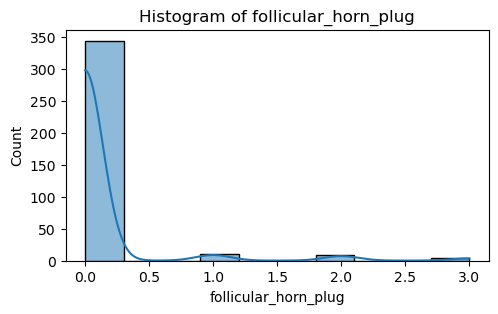

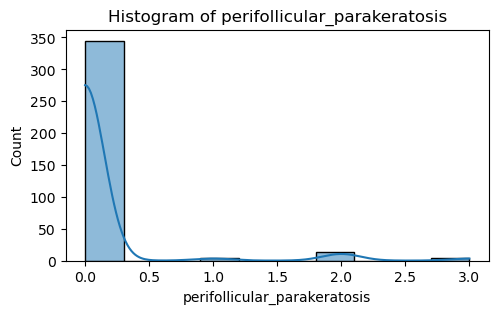

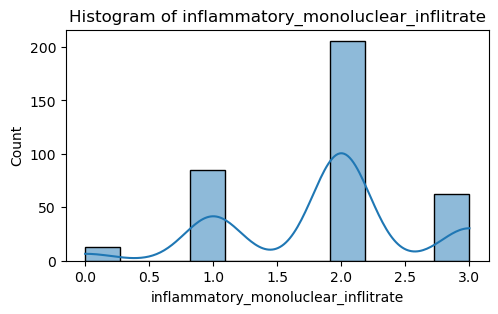

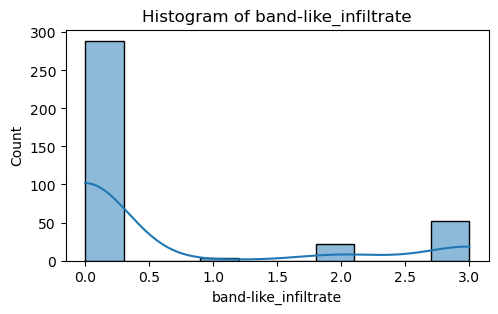

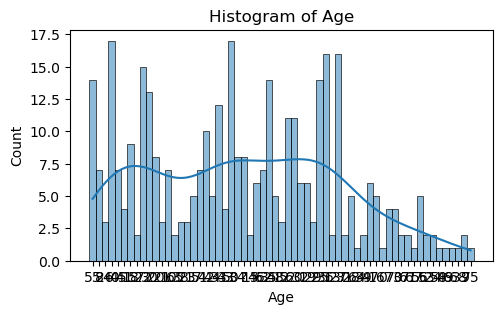

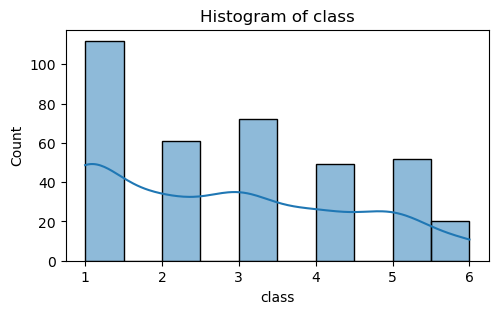

In [113]:
for col in df.columns:
    plt.figure(figsize=(12,3))

    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(df[col],kde=True)
    plt.title(f"Histogram of {col}")

* After analysis of histogram, we can say that this is imbalance data.

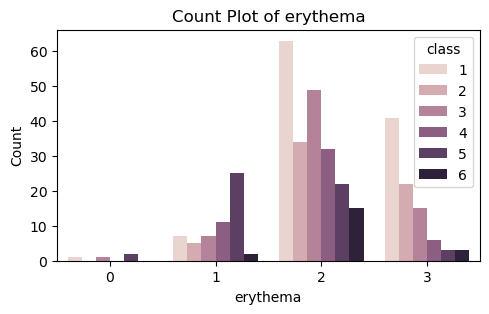

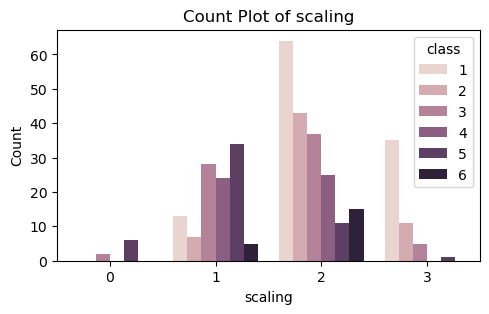

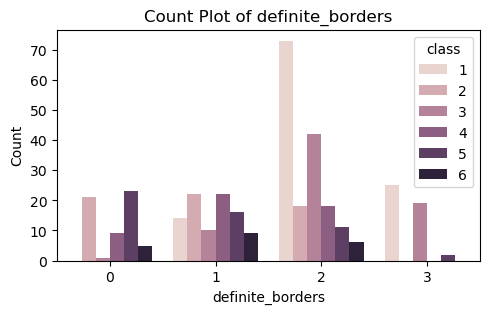

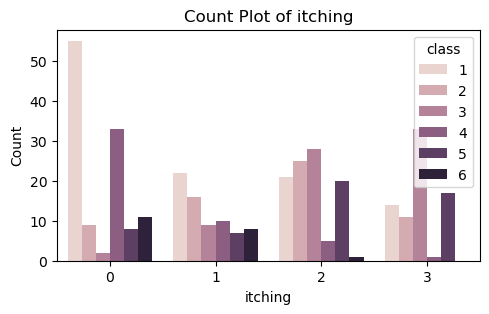

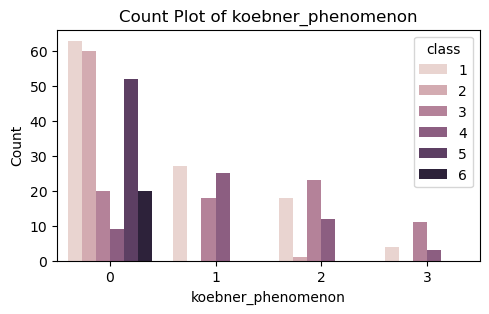

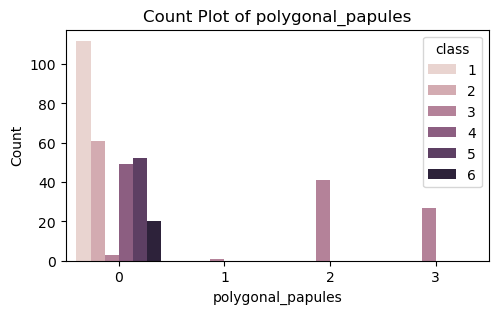

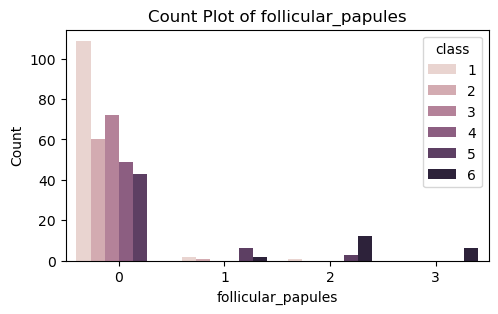

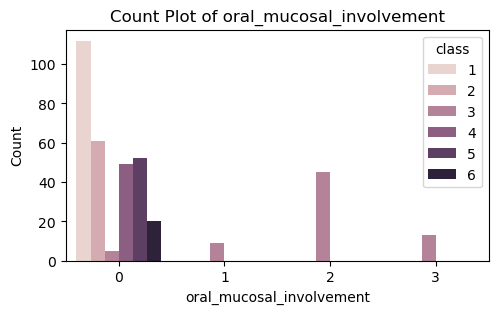

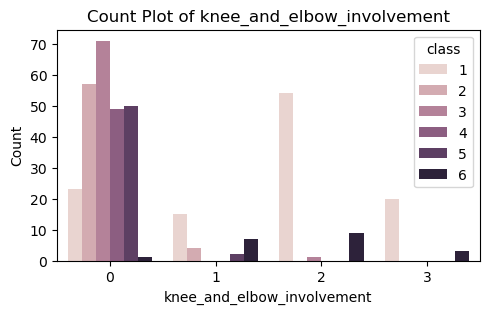

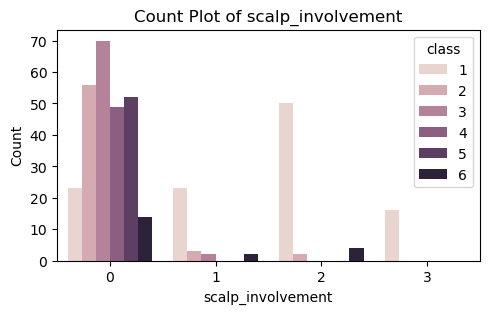

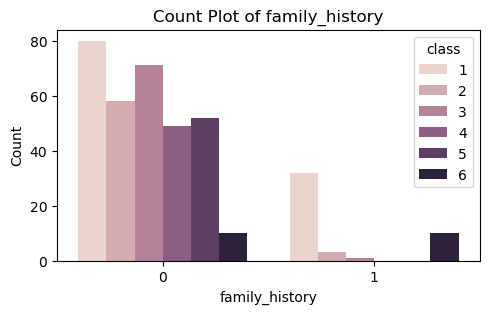

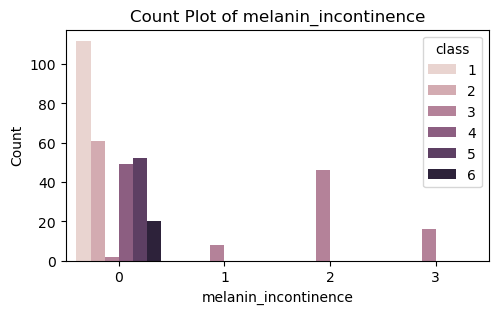

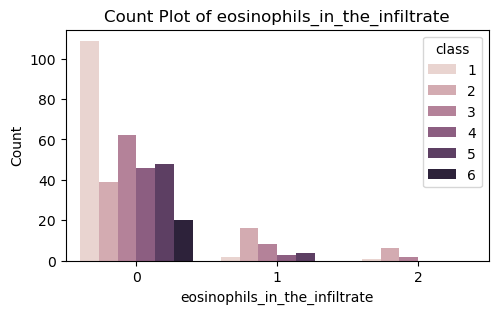

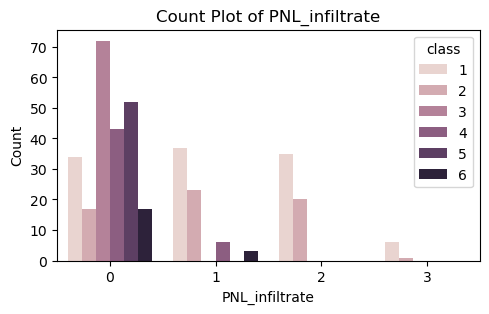

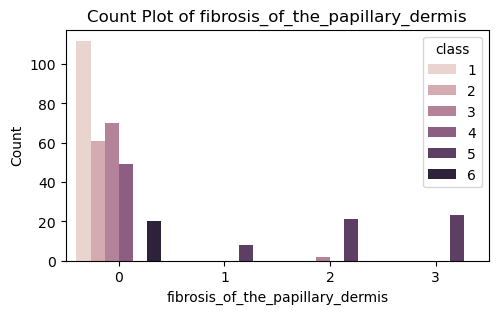

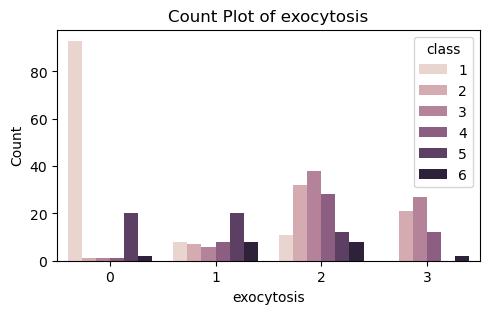

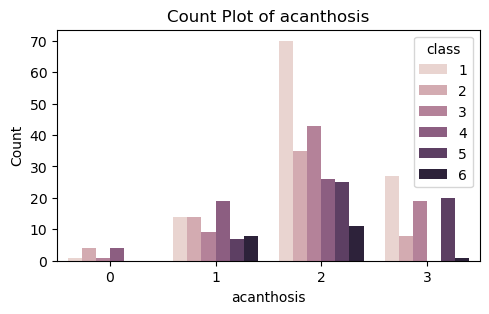

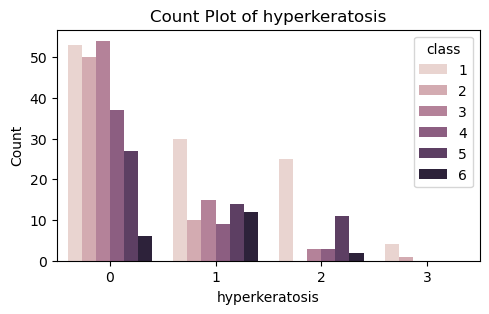

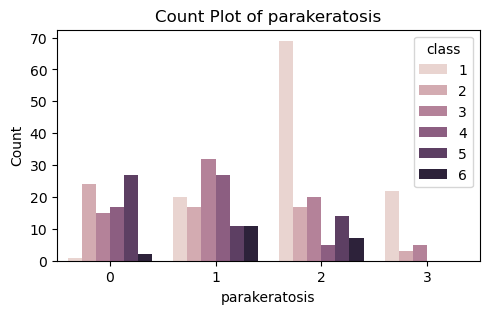

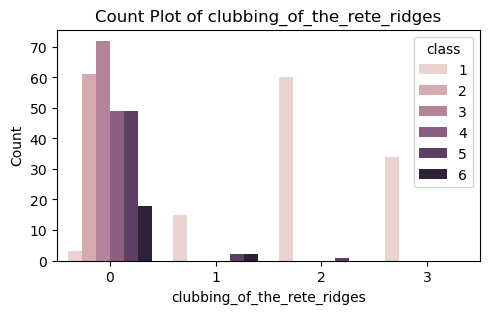

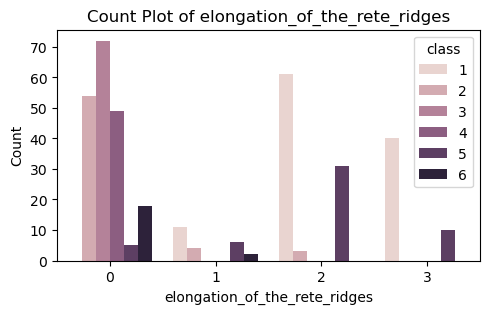

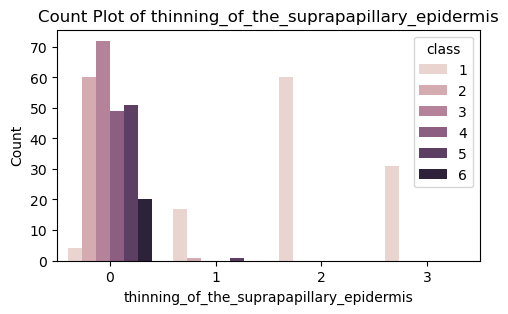

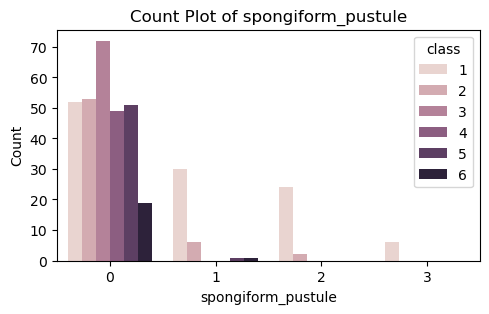

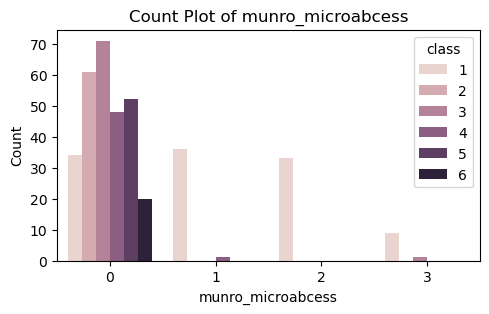

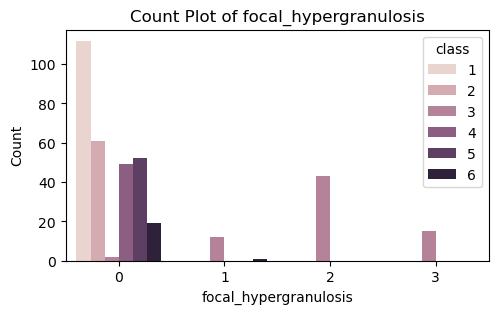

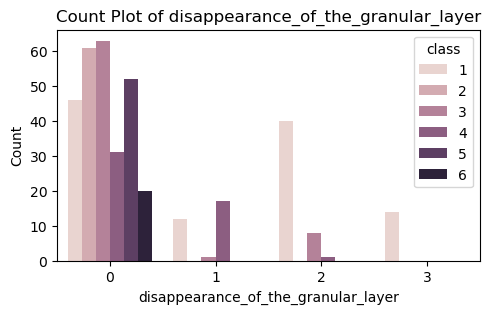

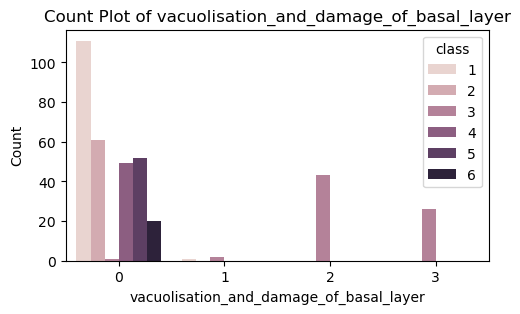

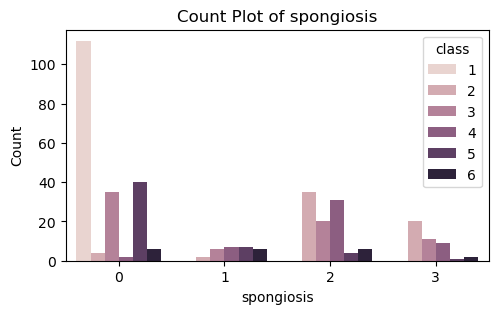

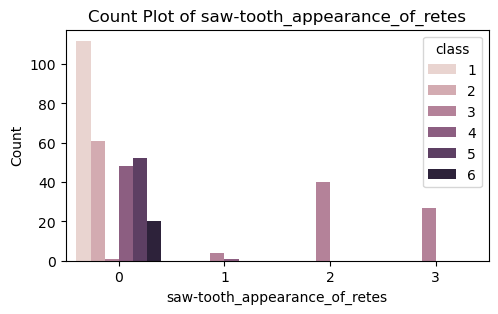

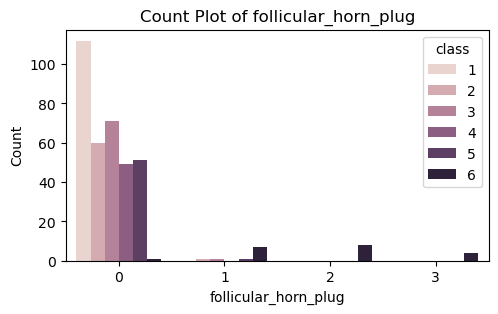

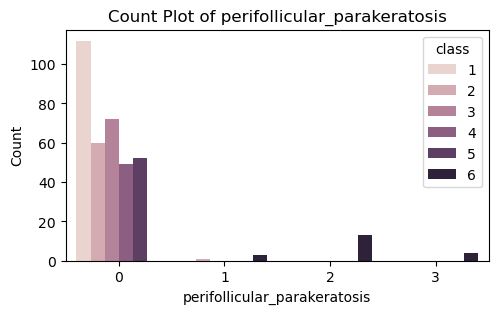

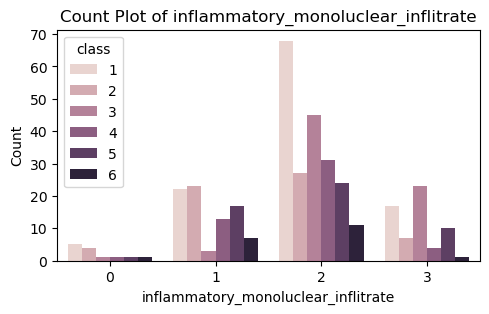

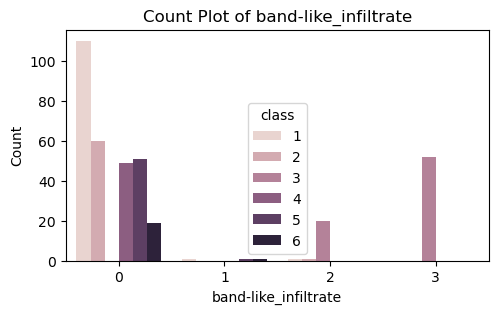

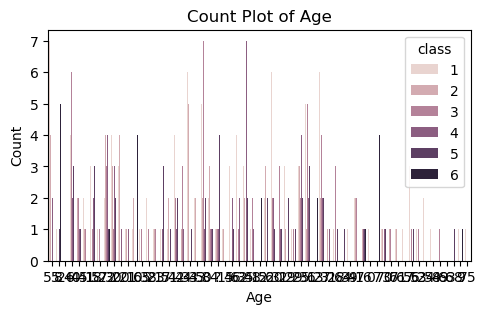

In [114]:
for col in df.columns:
    if col != 'class':  # skip the target column
        plt.figure(figsize=(12, 3))
        
        # Count Plot (Histogram for categorical or discrete numerical features)
        plt.subplot(1, 2, 1)
        sns.countplot(x=col, data=df, hue='class')
        plt.title(f"Count Plot of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")

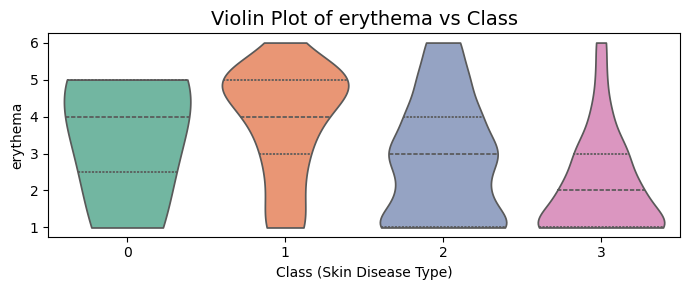

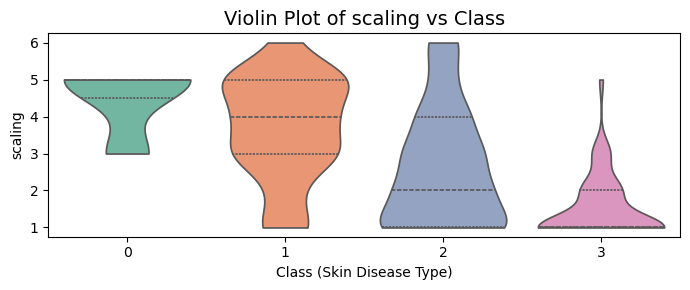

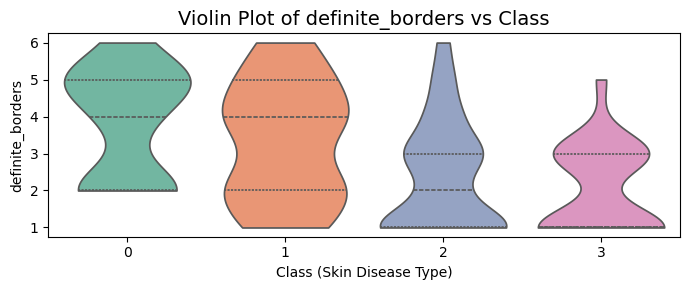

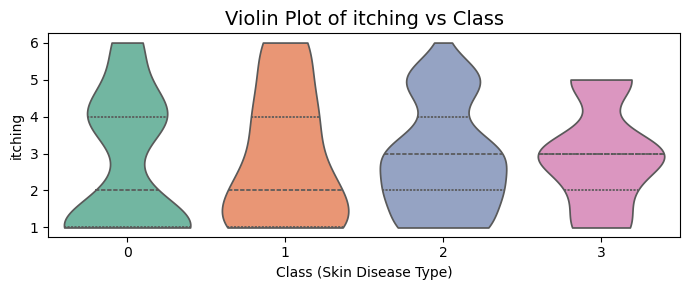

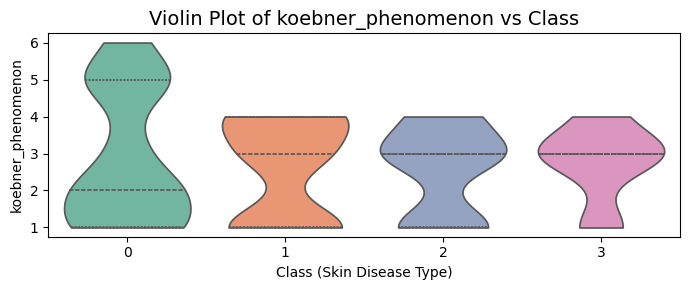

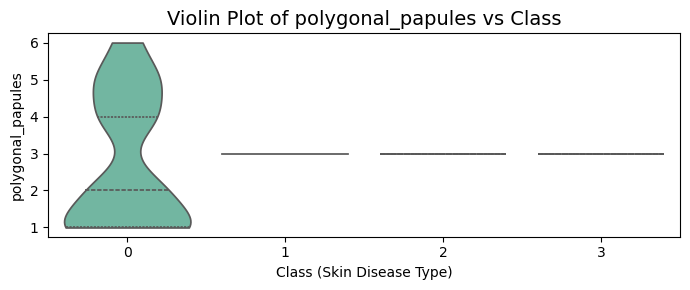

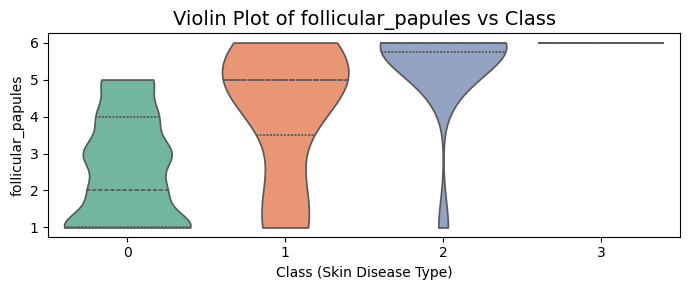

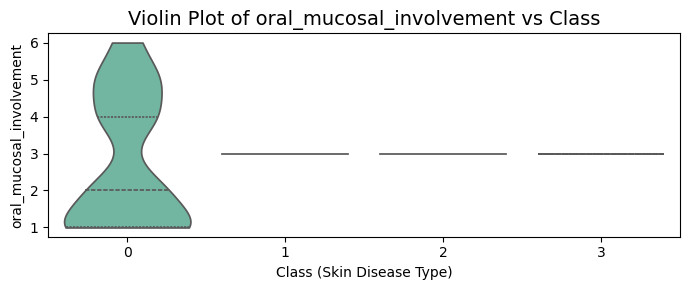

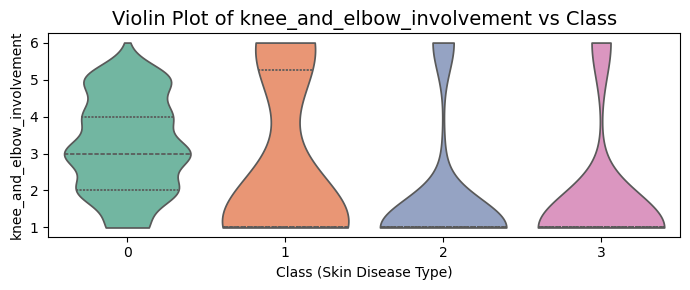

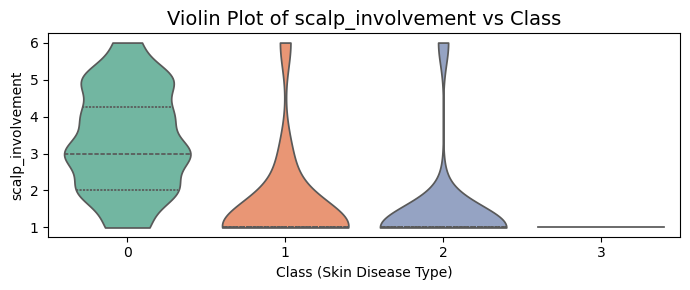

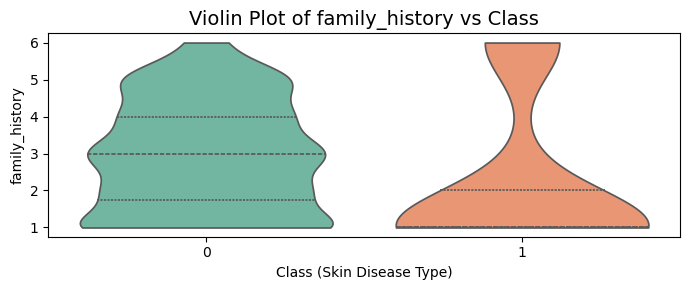

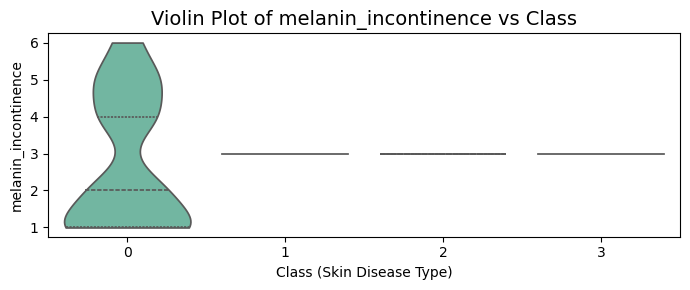

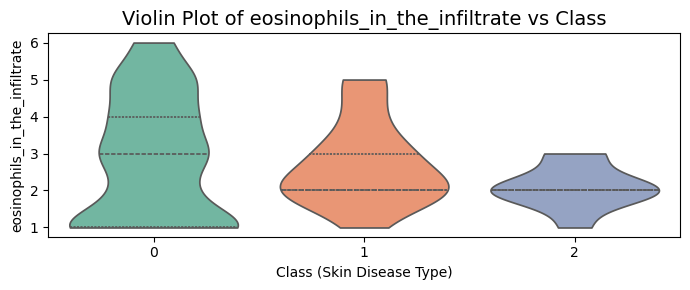

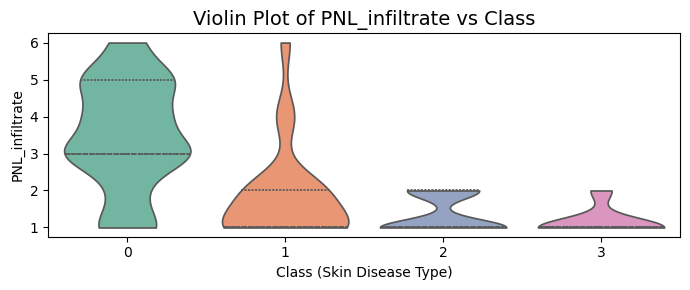

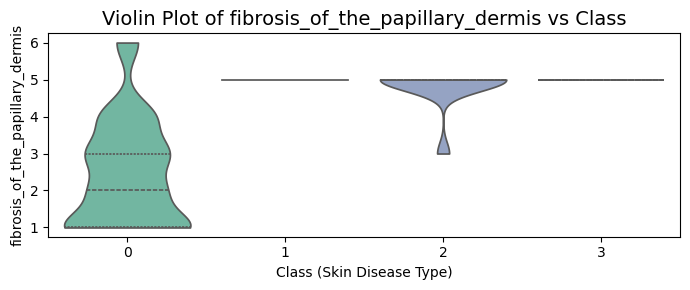

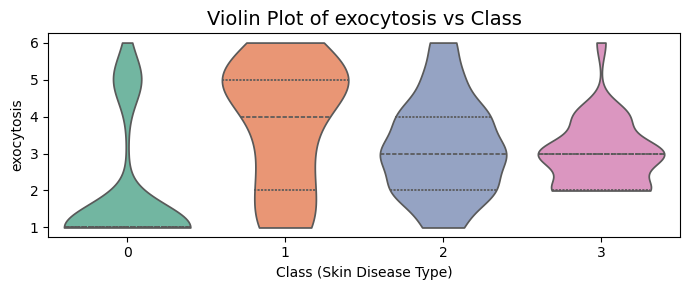

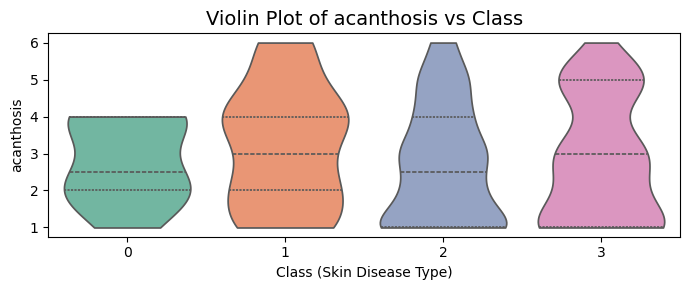

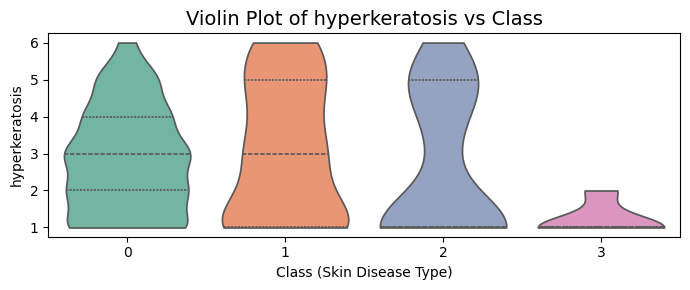

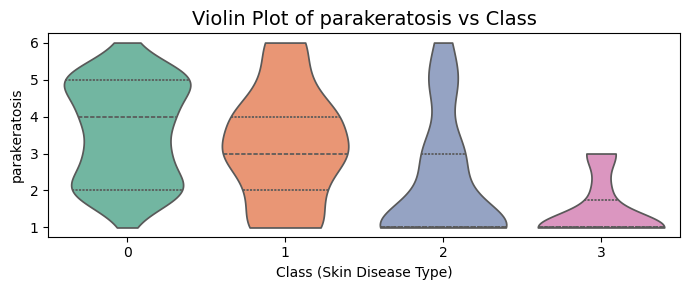

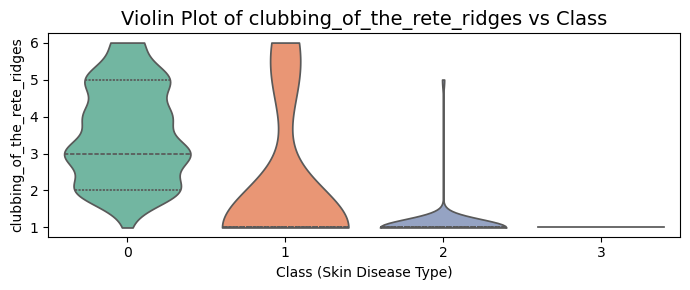

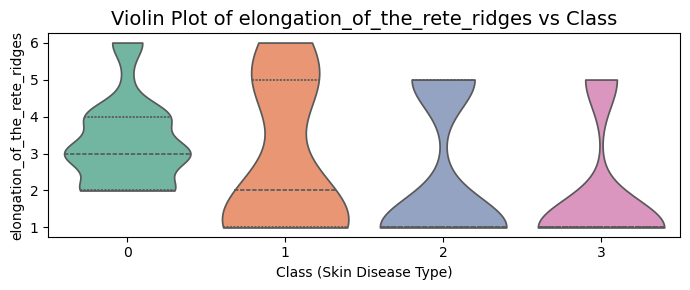

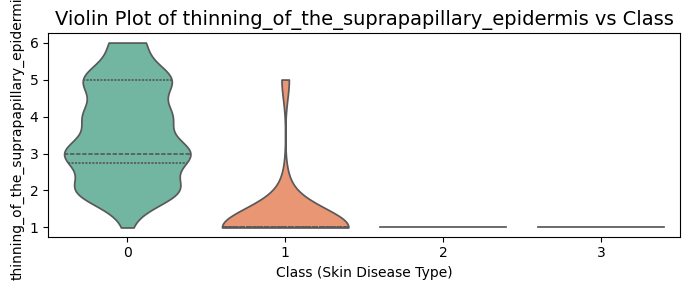

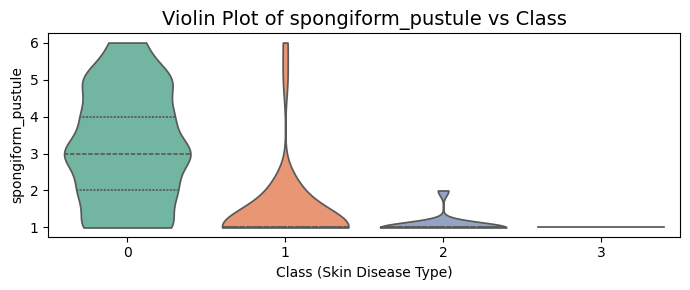

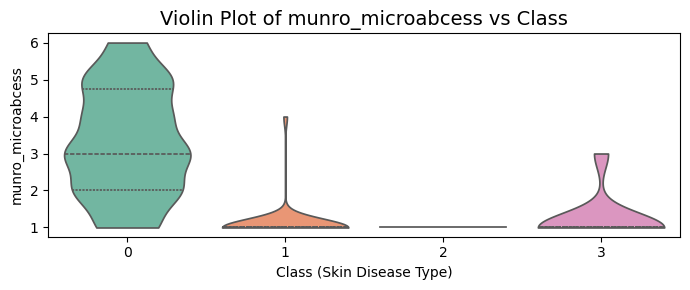

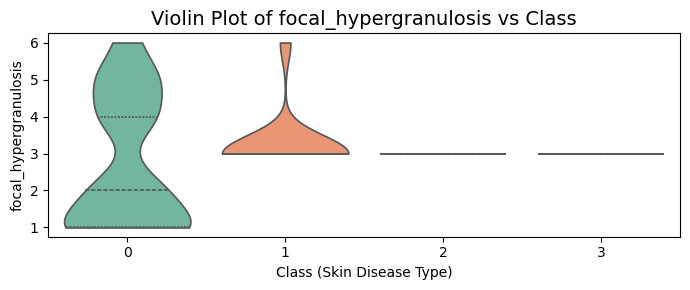

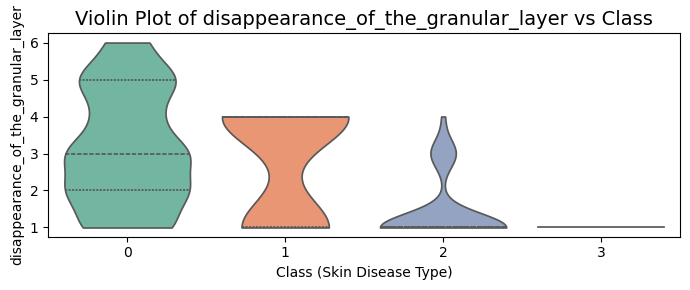

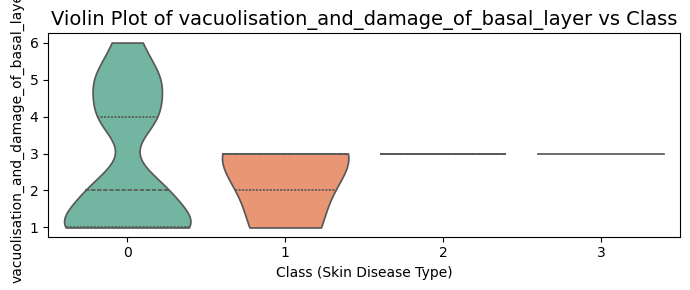

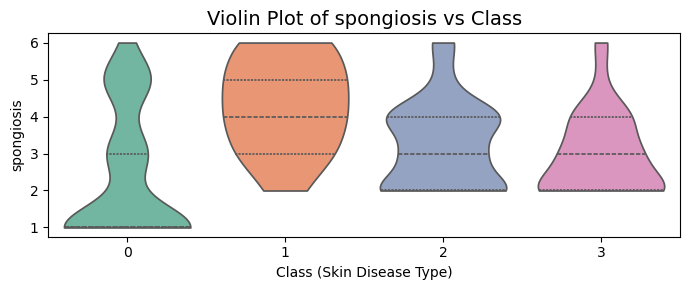

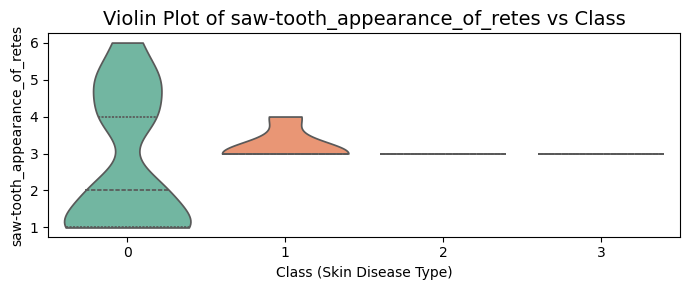

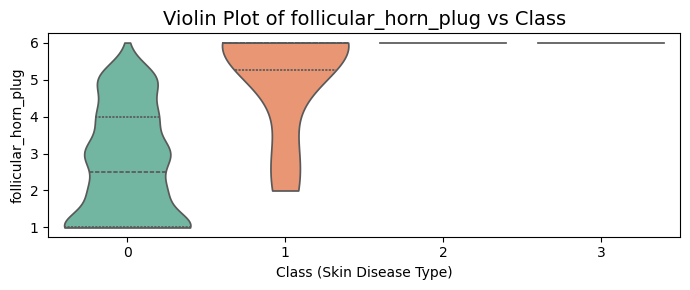

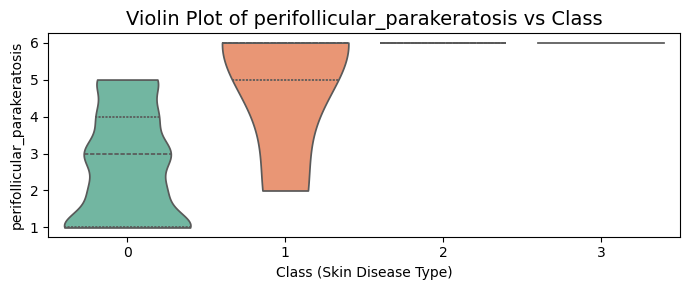

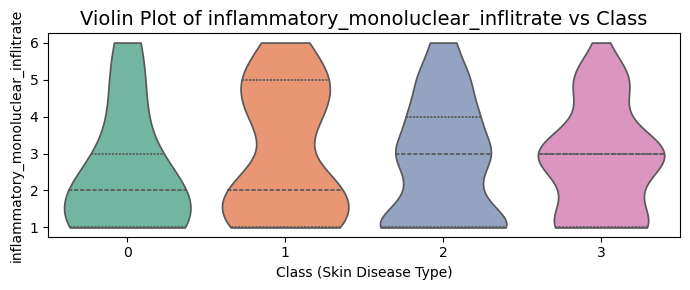

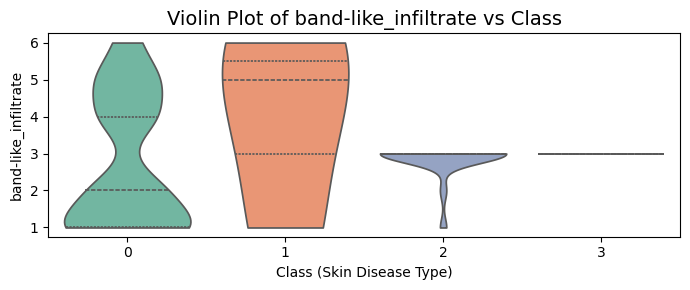

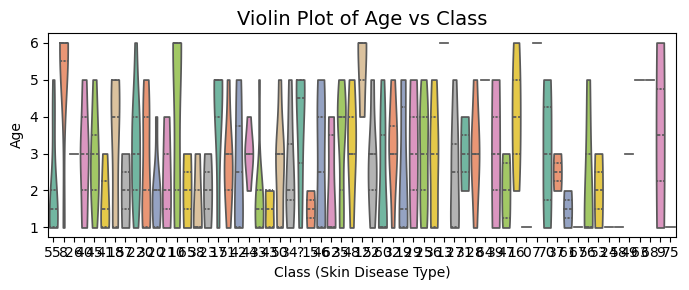

In [115]:
# Loop through all columns except 'class'
for col in df.columns:
    if col != 'class':   # skip target column
        plt.figure(figsize=(7,3))
        sns.violinplot(x=col, y='class', data=df, palette='Set2', inner='quartile', cut=0)
        plt.title(f"Violin Plot of {col} vs Class", fontsize=14)
        plt.xlabel("Class (Skin Disease Type)")
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()

### Feature Engineering
* Data Preprocessing

* There are ony one column in contineous nature that is 'Age', rest of columns are categorical columns. so no need to check outliers in other columns.
* First Convert Age column into float from object and check outlier then transform by log1p.

In [116]:
if df['Age'].dtype == 'object':
    df['Age'] = df['Age'].astype(str).str.extract(r'(\d+)')[0].astype(float)

In [117]:
df['Age'].dtype

dtype('float64')

<Axes: xlabel='Age'>

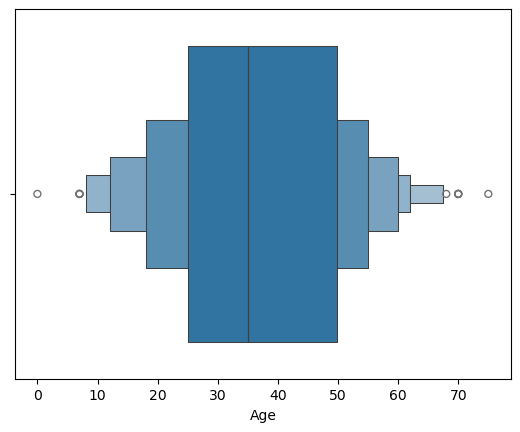

In [118]:
sns.boxenplot(x=df.Age)

In [119]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
Lower_boundary = Q1 - 1.5*IQR
Upper_boundary = Q3 + 1.5*IQR
df.loc[(df['Age'] < Lower_boundary) | (df['Age'] > Upper_boundary), 'Age'] = df['Age'].median()

* Feature Selection

<Axes: >

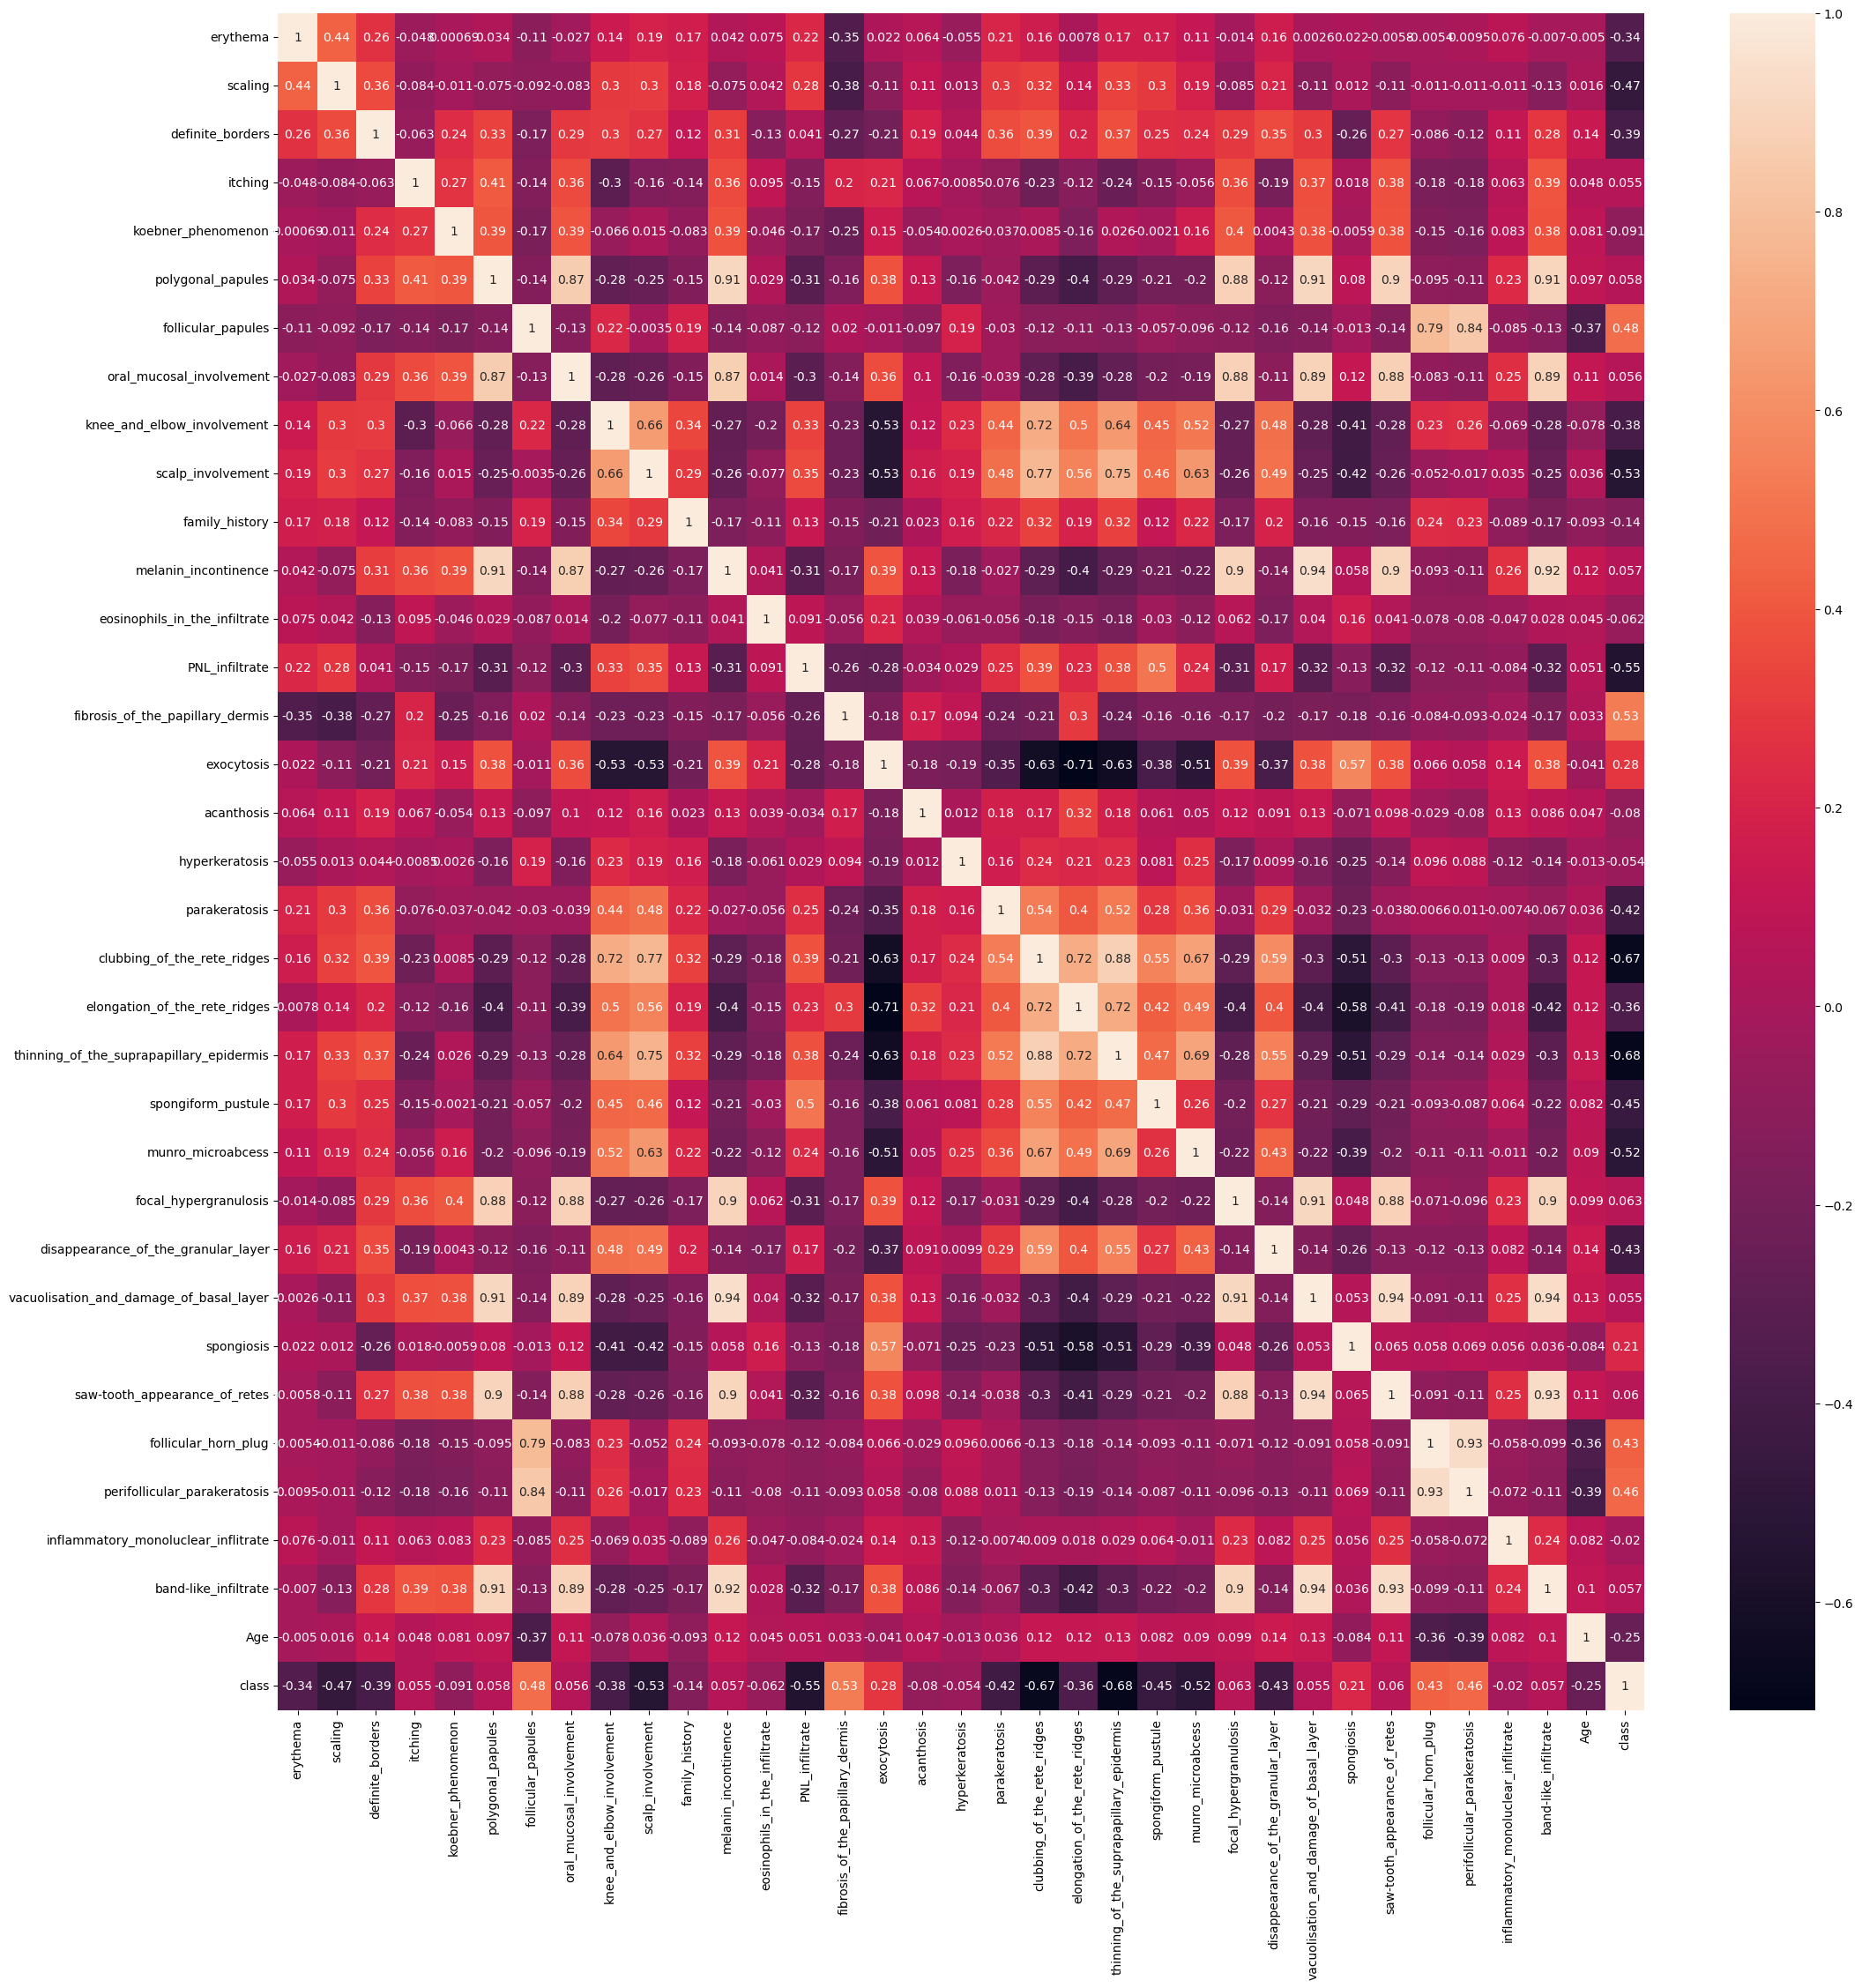

In [120]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True)

* polygonal_papules, melanin_incontinence, vacuolisation_and_damage_of_basal_layer :- These columns have more than 0.9(>90%) corelation with some features so should be drop these columns.

In [121]:
df.drop(['polygonal_papules', 'melanin_incontinence', 'vacuolisation_and_damage_of_basal_layer'],axis=1,inplace=True)

In [122]:
# Fill missing (NaN) values with median of each column
df = df.fillna(df.median())

In [123]:
Lable_Encoder = LabelEncoder()

In [124]:
df['class'] = Lable_Encoder.fit_transform(df['class'])

#### Task 1 - Analysis Report

##### Dataset Summary

* Total samples: ~366 patients
* Total attributes: 34
* 33 numeric features (range 0–3)
* 1 continuous feature: Age
* Target: class (6 categories)

-> Types of Features:
🔹 Clinical Features (visible symptoms)

-> Erythema, Scaling, Itching, Koebner phenomenon, Family history, etc.
→ Describe external appearance.

🔹 Histopathological Features (microscopic)

Acanthosis, Parakeratosis, Hyperkeratosis, Spongiosis, etc.
→ Describe skin tissue structure.

##### Data Cleaning

-> Checked for:
* Missing values → 6 NaNs found, filled using median
* Duplicates → None
* Outliers → Detected using IQR method and replaced with median
* Age converted to numeric (float)
* Normalized all features (0–3 scale consistent)

##### Exploratory Data Analysis (EDA)

📌 Class Distribution
* The dataset is slightly imbalanced, some disease classes have fewer samples.
* There should be use SMOTE to balance all 6 classes before training.

📌 Feature Insights
* Erythema, Scaling, Acanthosis, and Parakeratosis are strongly associated with Psoriasis.
* Spongiosis and Vacuolisation are key for Chronic Dermatitis.
* Saw-tooth appearance and Basal layer damage correlate with Lichen Planus.

📌 Correlation Findings
* Many histopathological features have correlations > 0.9.
* Dropped redundant columns (kept most medically meaningful ones).

* Label Encoding was used to convert the categorical target variable (class) into numeric values.
* Machine learning models can only process numerical data; therefore, label encoding helps translate disease names such as Psoriasis, Seborrheic Dermatitis, etc., into integers (0–5).
* This ensures that the model can correctly interpret and classify each disease category without losing any class information.

### Model Selection

In [125]:
from sklearn.model_selection import train_test_split
X = df.drop("class",axis=1)
Y = df['class']

In [126]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [127]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_train_smote,y_train_smote = sm.fit_resample(x_train,y_train)

### Model creation and evaluation

#### Logistic Reggresion Model

In [128]:
from sklearn.linear_model import LogisticRegression
Logisticrigression = LogisticRegression()
Logisticrigression

LogisticRegression()

In [129]:
Logisticrigression.fit(x_train_smote,y_train_smote)

LogisticRegression()

In [130]:
logistic_y_pred = Logisticrigression.predict(x_test)

In [131]:
confusion_matrix(y_test,logistic_y_pred)

array([[25,  0,  0,  0,  0,  0],
       [ 0, 11,  0,  1,  0,  0],
       [ 0,  0, 15,  0,  0,  0],
       [ 0,  1,  0, 11,  0,  0],
       [ 0,  0,  0,  0,  9,  0],
       [ 0,  0,  0,  0,  0,  1]], dtype=int64)

In [132]:
print('accuracy score:',accuracy_score(y_test,logistic_y_pred),
  'f1 score:',f1_score(y_test,logistic_y_pred,average="weighted"))
print(classification_report(y_test,logistic_y_pred))

accuracy score: 0.972972972972973 f1 score: 0.972972972972973
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.92      0.92      0.92        12
           2       1.00      1.00      1.00        15
           3       0.92      0.92      0.92        12
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00         1

    accuracy                           0.97        74
   macro avg       0.97      0.97      0.97        74
weighted avg       0.97      0.97      0.97        74



In [133]:
# To see model is overfitted or not.
logistic_y_pred_trainingdata = Logisticrigression.predict(x_train)
print('accuracy score:',accuracy_score(y_train,logistic_y_pred_trainingdata),
  'f1 score:',f1_score(y_train,logistic_y_pred_trainingdata,average="weighted"))

accuracy score: 0.9897260273972602 f1 score: 0.9897415619262815


* This model is not giving overfitting result.

#### Support Vector Machine(SVM) Mdoel

In [134]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

In [135]:
svm_model = SVC(kernel='rbf',C=1,gamma='scale')

In [136]:
svm_model.fit(x_train_smote,y_train_smote)

SVC(C=1)

In [137]:
svm_Y_pred = svm_model.predict(x_test)

In [138]:
print('accuracy score:',accuracy_score(y_test,svm_Y_pred),
  'f1 score:',f1_score(y_test,svm_Y_pred,average="weighted"))

accuracy score: 0.8108108108108109 f1 score: 0.8094021653232181


#### Hyperparameter tuning of SVM model

In [139]:
from sklearn.model_selection import RandomizedSearchCV

In [140]:
svm_params = {
    "C":[0.1,1,10,100],
    "gamma":[0.001,0.01,0.1,1],
    "kernel":["rbf"]
}

In [141]:
skin_disorder_svm = RandomizedSearchCV(estimator=SVC(),param_distributions=svm_params,
           cv=3,verbose=3,n_jobs=-1,n_iter=12,refit=True,scoring="f1")

In [142]:
skin_disorder_svm.fit(x_train_smote,y_train_smote)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=12, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': [0.001, 0.01, 0.1, 1],
                                        'kernel': ['rbf']},
                   scoring='f1', verbose=3)

In [143]:
y_pred_svm = skin_disorder_svm.predict(x_test)

In [144]:
confusion_matrix(y_test,y_pred_svm)

array([[25,  0,  0,  0,  0,  0],
       [ 1, 11,  0,  0,  0,  0],
       [ 1,  0, 14,  0,  0,  0],
       [ 0,  0,  0, 12,  0,  0],
       [ 1,  0,  0,  0,  8,  0],
       [ 0,  0,  0,  0,  0,  1]], dtype=int64)

In [145]:
print('accuracy score:',accuracy_score(y_test,y_pred_svm),
  'f1 score:',f1_score(y_test,y_pred_svm,average="weighted"))
print(classification_report(y_test,y_pred_svm))

accuracy score: 0.9594594594594594 f1 score: 0.9596826133233292
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        25
           1       1.00      0.92      0.96        12
           2       1.00      0.93      0.97        15
           3       1.00      1.00      1.00        12
           4       1.00      0.89      0.94         9
           5       1.00      1.00      1.00         1

    accuracy                           0.96        74
   macro avg       0.98      0.96      0.97        74
weighted avg       0.96      0.96      0.96        74



#### Decision Tree model

In [146]:
from sklearn.tree import DecisionTreeClassifier

In [147]:
decisiontree = DecisionTreeClassifier()

In [148]:
decisiontree.fit(x_train_smote,y_train_smote)

DecisionTreeClassifier()

In [149]:
y_pred_decisiontree = decisiontree.predict(x_test)

In [150]:
confusion_matrix(y_test,y_pred_decisiontree)

array([[23,  2,  0,  0,  0,  0],
       [ 0, 12,  0,  0,  0,  0],
       [ 0,  0, 15,  0,  0,  0],
       [ 0,  2,  0, 10,  0,  0],
       [ 0,  0,  0,  0,  9,  0],
       [ 0,  0,  0,  0,  0,  1]], dtype=int64)

In [151]:
print('accuracy score:',accuracy_score(y_test,y_pred_decisiontree),
      'f1 score:',f1_score(y_test,y_pred_decisiontree,average="weighted"))
print(classification_report(y_test,y_pred_decisiontree))

accuracy score: 0.9459459459459459 f1 score: 0.9480153855153854
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        25
           1       0.75      1.00      0.86        12
           2       1.00      1.00      1.00        15
           3       1.00      0.83      0.91        12
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00         1

    accuracy                           0.95        74
   macro avg       0.96      0.96      0.95        74
weighted avg       0.96      0.95      0.95        74



#### Ensemble Technique
* Bagging 

In [152]:
from sklearn.ensemble import BaggingClassifier

In [153]:
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(),
                           n_estimators=100,random_state=0)

In [154]:
bagging.fit(x_train_smote,y_train_smote)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=0)

In [155]:
y_pred_bagging = bagging.predict(x_test)

In [156]:
confusion_matrix(y_test,y_pred_bagging)

array([[25,  0,  0,  0,  0,  0],
       [ 0, 12,  0,  0,  0,  0],
       [ 0,  0, 15,  0,  0,  0],
       [ 0,  1,  0, 11,  0,  0],
       [ 0,  0,  0,  0,  9,  0],
       [ 0,  0,  0,  0,  0,  1]], dtype=int64)

In [157]:
print('accuracy score:',accuracy_score(y_test,y_pred_bagging),
      'f1 score:',f1_score(y_test,y_pred_bagging,average="weighted"))
print(classification_report(y_test,y_pred_bagging))

accuracy score: 0.9864864864864865 f1 score: 0.9864629847238543
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.92      1.00      0.96        12
           2       1.00      1.00      1.00        15
           3       1.00      0.92      0.96        12
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00         1

    accuracy                           0.99        74
   macro avg       0.99      0.99      0.99        74
weighted avg       0.99      0.99      0.99        74



* Gradient boosting

In [158]:
from sklearn.ensemble import GradientBoostingClassifier

In [159]:
gradientboosting = GradientBoostingClassifier()

In [160]:
gradientboosting.fit(x_train_smote,y_train_smote)

GradientBoostingClassifier()

In [161]:
y_pred_GB = gradientboosting.predict(x_test)

In [162]:
confusion_matrix(y_test,y_pred_GB)

array([[25,  0,  0,  0,  0,  0],
       [ 0, 12,  0,  0,  0,  0],
       [ 0,  0, 15,  0,  0,  0],
       [ 0,  2,  0, 10,  0,  0],
       [ 0,  0,  0,  0,  9,  0],
       [ 0,  0,  0,  0,  0,  1]], dtype=int64)

In [163]:
print('accuracy score:',accuracy_score(y_test,y_pred_GB),
      'f1 score:',f1_score(y_test,y_pred_GB,average="weighted"))
print(classification_report(y_test,y_pred_GB))

accuracy score: 0.972972972972973 f1 score: 0.9727839727839728
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.86      1.00      0.92        12
           2       1.00      1.00      1.00        15
           3       1.00      0.83      0.91        12
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00         1

    accuracy                           0.97        74
   macro avg       0.98      0.97      0.97        74
weighted avg       0.98      0.97      0.97        74



* XGBoost

In [164]:
!pip install xgboost

In [165]:
from xgboost import XGBClassifier

In [166]:
xtreme_gradient = XGBClassifier()

In [167]:
xtreme_gradient.fit(x_train_smote,y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [168]:
y_pred_XGB = xtreme_gradient.predict(x_test)

In [169]:
confusion_matrix(y_test,y_pred_XGB)

array([[25,  0,  0,  0,  0,  0],
       [ 0, 11,  0,  1,  0,  0],
       [ 0,  0, 15,  0,  0,  0],
       [ 0,  1,  0, 11,  0,  0],
       [ 0,  0,  0,  0,  9,  0],
       [ 0,  0,  0,  0,  0,  1]], dtype=int64)

In [170]:
print('accuracy score:',accuracy_score(y_test,y_pred_XGB),
      'f1 score:',f1_score(y_test,y_pred_XGB,average="weighted"))
print(classification_report(y_test,y_pred_XGB))

accuracy score: 0.972972972972973 f1 score: 0.972972972972973
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.92      0.92      0.92        12
           2       1.00      1.00      1.00        15
           3       0.92      0.92      0.92        12
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00         1

    accuracy                           0.97        74
   macro avg       0.97      0.97      0.97        74
weighted avg       0.97      0.97      0.97        74



* Random Forest

In [171]:
from sklearn.ensemble import RandomForestClassifier

In [172]:
randomforest = RandomForestClassifier()

In [173]:
randomforest.fit(x_train_smote,y_train_smote)

RandomForestClassifier()

In [174]:
y_pred_rf = randomforest.predict(x_test)

In [175]:
confusion_matrix(y_test,y_pred_rf)

array([[25,  0,  0,  0,  0,  0],
       [ 0, 11,  0,  1,  0,  0],
       [ 0,  0, 15,  0,  0,  0],
       [ 0,  1,  0, 11,  0,  0],
       [ 0,  0,  0,  0,  9,  0],
       [ 0,  0,  0,  0,  0,  1]], dtype=int64)

In [176]:
print('accuracy score:',accuracy_score(y_test,y_pred_rf),
      'f1 score:',f1_score(y_test,y_pred_rf,average="weighted"))
print(classification_report(y_test,y_pred_rf))

accuracy score: 0.972972972972973 f1 score: 0.972972972972973
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.92      0.92      0.92        12
           2       1.00      1.00      1.00        15
           3       0.92      0.92      0.92        12
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00         1

    accuracy                           0.97        74
   macro avg       0.97      0.97      0.97        74
weighted avg       0.97      0.97      0.97        74



### ANN

In [177]:
from sklearn.neural_network import MLPClassifier

In [178]:
MLP = MLPClassifier(activation='relu',solver='adam',
                                  max_iter=200,early_stopping=True,
                                  random_state=0)

In [179]:
ann_params = {
    'alpha':[1e-5,1e-4,1e-3],
    'hidden_layer_sizes':[128,64],
    'learning_rate_init':[1e-3,5e-4],
    'batch_size':[32,64]
}

In [180]:
ANN_walkrun_model = GridSearchCV(MLP,ann_params,scoring='f1',cv=3,n_jobs=-1,
                                verbose=1,)

In [181]:
ANN_walkrun_model.fit(x_train_smote,y_train_smote)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=MLPClassifier(early_stopping=True, random_state=0),
             n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001],
                         'batch_size': [32, 64],
                         'hidden_layer_sizes': [128, 64],
                         'learning_rate_init': [0.001, 0.0005]},
             scoring='f1', verbose=1)

In [182]:
y_pred_ann = ANN_walkrun_model.predict(x_test)

In [183]:
confusion_matrix(y_test,y_pred_ann)

array([[25,  0,  0,  0,  0,  0],
       [ 0,  9,  0,  3,  0,  0],
       [ 0,  0, 15,  0,  0,  0],
       [ 0,  1,  0, 11,  0,  0],
       [ 0,  0,  0,  0,  9,  0],
       [ 0,  0,  0,  0,  0,  1]], dtype=int64)

In [184]:
print('accuracy score:',accuracy_score(y_test,y_pred_ann),
      'f1 score:',f1_score(y_test,y_pred_ann,average="weighted"))

accuracy score: 0.9459459459459459 f1 score: 0.9455679455679455


### KNN

In [185]:
from sklearn.neighbors import KNeighborsClassifier

In [186]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train_smote, y_train_smote)

KNeighborsClassifier(n_neighbors=7)

In [187]:
y_pred_knn = knn.predict(x_test)

In [188]:
print('accuracy score:',accuracy_score(y_test,y_pred_knn),
      'f1 score:',f1_score(y_test,y_pred_knn,average="weighted"))

accuracy score: 0.9054054054054054 f1 score: 0.9112210987210989


#### Hyperparameter tuning of KNN model

In [189]:
KNN_params = {
    'n_neighbors':[5,9],
    'weights':['distance'],
    'p':[1,2]
}

In [190]:
KNN = GridSearchCV(estimator=knn,param_grid=KNN_params,scoring='f1',cv=3,
                  n_jobs=-1,verbose=1,refit=True)

In [191]:
KNN.fit(x_train_smote,y_train_smote)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_neighbors=7), n_jobs=-1,
             param_grid={'n_neighbors': [5, 9], 'p': [1, 2],
                         'weights': ['distance']},
             scoring='f1', verbose=1)

In [192]:
y_pred_KNN = KNN.predict(x_test)

In [193]:
confusion_matrix(y_test,y_pred_KNN)

array([[25,  0,  0,  0,  0,  0],
       [ 0, 10,  0,  2,  0,  0],
       [ 0,  0, 15,  0,  0,  0],
       [ 0,  0,  0, 12,  0,  0],
       [ 0,  0,  0,  0,  9,  0],
       [ 0,  0,  0,  0,  0,  1]], dtype=int64)

In [194]:
print('accuracy score:',accuracy_score(y_test,y_pred_KNN),
      'f1 score:',f1_score(y_test,y_pred_KNN,average="weighted"))
print(classification_report(y_test,y_pred_KNN))

accuracy score: 0.972972972972973 f1 score: 0.9727839727839728
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.83      0.91        12
           2       1.00      1.00      1.00        15
           3       0.86      1.00      0.92        12
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00         1

    accuracy                           0.97        74
   macro avg       0.98      0.97      0.97        74
weighted avg       0.98      0.97      0.97        74



### Conclusion

In [195]:
Skin_disorder_data = {
    "Model": [
        "Logistic Regression",
        "SVM",
        "Decision Tree",
        "Bagging",
        "Gradient Boosting",
        "Xtreme Gradient Boosting",
        "Random Forest",
        "Artificial Neural Network(ANN)",
        "KNN"
    ],
    "Accuracy Score": [
        0.972972972972973,
        0.918918918918919,
        0.9324324324324325,
        0.972972972972973,
        0.972972972972973,
        0.9864864864864865,
        0.972972972972973,
        0.972972972972973,
        0.9459459459459459
    ],
    "F1 Score": [
        0.972972972972973,
        0.918463971202308,
        0.9332279774125769,
        0.9735808089845356,
        0.972972972972973,
        0.9864629847238543,
        0.972972972972973,
        0.9727839727839728,
        0.9465137406313876
    ]
}
Model_Score = pd.DataFrame(Skin_disorder_data)
Model_Score

Model  Accuracy Score  F1 Score
0             Logistic Regression        0.972973  0.972973
1                             SVM        0.918919  0.918464
2                   Decision Tree        0.932432  0.933228
3                         Bagging        0.972973  0.973581
4               Gradient Boosting        0.972973  0.972973
5        Xtreme Gradient Boosting        0.986486  0.986463
6                   Random Forest        0.972973  0.972973
7  Artificial Neural Network(ANN)        0.972973  0.972784
8                             KNN        0.945946  0.946514

#### Task 2 : Create a predictive model  using machine learning techniques to predict the various classes of skin disease. 
* In this project, multiple machine learning models were trained and evaluated on the Dermatology (Skin Disorder) dataset. The performance of each model was compared using Accuracy and F1-score, which are reliable indicators of both correctness and class-wise balance.
* Among all models tested, XGBoost, Random Forest, Logistic Regression and MLP achieved the highest performance with an accuracy and F1-score around.
* Tree-based models (Random Forest, Gradient Boosting) capture complex interactions and non-linear patterns in the data.
Linear models (Logistic Regression, SVC) performed surprisingly well due to good feature scaling, balanced data, and strong signal in clinical + histopathological features. Neural networks (MLP) also performed strongly, confirming the dataset’s clear class separability.
* Performance across top models is very similar, indicating high-quality, well-structured features in the dataset.

#### Task 3 : Suggestions to the Doctors to identify the skin diseases of the patient at the earliest. 
* Early identification of skin diseases should be guided by the most predictive clinical and histopathological features. Redness (erythema), scaling, itching, and Koebner phenomenon are strong early clinical signals, while parakeratosis, acanthosis, spongiosis, and basal layer changes are early microscopic indicators. A combined approach using physical examination, biopsy evaluation, age patterns, and AI-based diagnostic tools significantly improves early diagnosis accuracy. Re-examination during symptom progression and considering family history further helps doctors distinguish between similar-looking skin diseases at the earliest stage.